In [5]:
from _mg import *

import matplotlib.pyplot as plt
from scipy import stats
import warnings

In [6]:
g = gdf

In [7]:
g['relative_accuracy'] = g['f1_score'] / g['acc_score']
g['relative_f1'] = g['f1_f1'] / g['acc_f1']
g['relative_recall'] = g['f1_recall'] / g['acc_recall']
g

acc_coef  acc_f1  acc_precision  acc_recall  acc_score  base_coef  \
0       1.30    0.56           0.68        0.47       0.85       3.86   
1       1.30    0.54           0.65        0.47       0.87       4.66   
2       1.40    0.30           0.61        0.20       0.95      15.99   
3       1.50    0.20           0.46        0.13       0.93      12.85   
4       1.15    0.54           0.67        0.45       0.75       2.13   
5       1.30    0.56           0.70        0.46       0.88       5.14   
6       1.35    0.66           0.77        0.58       0.96      12.23   
7       1.05    0.73           0.73        0.74       0.73       1.05   
8       1.40    0.31           0.63        0.21       0.94      13.45   
9       1.45    0.16           0.56        0.09       0.92      11.18   
10      1.45    0.03           0.07        0.02       0.99     104.24   
11      1.50    0.22           0.41        0.16       0.96      23.40   
12      1.25    0.65           0.70        0.61       0.92       7.28   
13      1.50    0.27           0.52        0.19       0.97      29.93   
14      1.45    0.02           0.08        0.01       0.98      58.75   
15      1.50    0.12           0.48        0.07       0.93      13.84   
16      1.40    0.35           0.61        0.25       0.85       5.30   
17      1.50    0.43           0.67        0.31       0.93      10.91   
18      1.35    0.39           0.61        0.29       0.99      61.96   
19      1.45    0.12           0.53        0.07       0.88       7.11   
20      1.45    0.42           0.49        0.36       0.97      30.06   
21      1.45    0.22           0.62        0.14       0.99      74.01   

    base_f1  base_recall  base_score  count       ...         f1_f1  \
0      0.00         0.00        0.80   1931       ...          0.62   
1      0.00         0.00        0.84   1617       ...          0.60   
2      0.00         0.00        0.95    530       ...          0.45   
3      0.00         0.00        0.93    663       ...          0.42   
4      0.01         0.01        0.66   3047       ...          0.61   
5      0.00         0.00        0.85   1513       ...          0.63   
6      0.00         0.00        0.93    697       ...          0.69   
7      0.72         0.72        0.72   4586       ...          0.74   
8      0.00         0.00        0.93    663       ...          0.44   
9      0.00         0.00        0.92    764       ...          0.35   
10     0.00         0.00        0.99     82       ...          0.13   
11     0.00         0.00        0.96    375       ...          0.34   
12     0.00         0.00        0.88   1138       ...          0.65   
13     0.00         0.00        0.97    307       ...          0.39   
14     0.00         0.00        0.98    162       ...          0.10   
15     0.00         0.00        0.93    644       ...          0.35   
16     0.00         0.00        0.84   1504       ...          0.54   
17     0.00         0.00        0.91    795       ...          0.54   
18     0.00         0.00        0.99    141       ...          0.42   
19     0.00         0.00        0.87   1184       ...          0.38   
20     0.00         0.00        0.97    296       ...          0.42   
21     0.00         0.00        0.99    127       ...          0.29   

    f1_precision  f1_recall  f1_score  freq        genre percent  \
0           0.54       0.73      0.82  0.79       Action    0.21   
1           0.51       0.72      0.84  0.83    Adventure    0.17   
2           0.42       0.50      0.93  0.94    Animation    0.06   
3           0.35       0.52      0.90  0.93    Biography    0.07   
4           0.52       0.74      0.69  0.68       Comedy    0.32   
5           0.57       0.70      0.87  0.84        Crime    0.16   
6           0.68       0.69      0.96  0.93  Documentary    0.07   
7           0.69       0.81      0.73  0.51        Drama    0.49   
8           0.36       0.57      0.90  0.93       Family    0.07   
9         

# Figure 1 - Undersampled Results

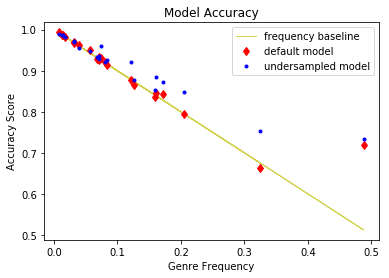

In [8]:
plt.plot(g.percent, g.freq, 'y-', alpha=0.7, linewidth=1)
plt.plot(g.percent, g.base_score, 'rd')
plt.plot(g.percent, g.acc_score, 'b.')
plt.legend(["frequency baseline", "default model", "undersampled model"])
# plt.plot(g.percent, g.base_recall, 'g.')
# plt.legend(["frequency based expectation", "accuracy", "recall"])
plt.xlabel("Genre Frequency")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy")
plt.savefig('figure_1a.png')

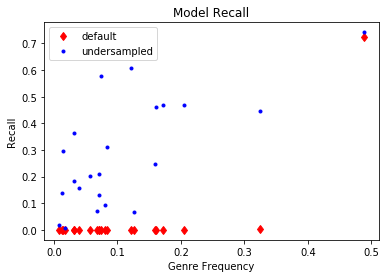

In [9]:
plt.plot(g.percent, g.base_recall, 'rd')
plt.plot(g.percent, g.acc_recall, 'b.')
plt.legend(["default", "undersampled"])
# plt.plot(g.percent, g.base_recall, 'g.')
# plt.legend(["frequency based expectation", "accuracy", "recall"])
plt.xlabel("Genre Frequency")
plt.ylabel("Recall")
plt.title("Model Recall")
plt.savefig('figure_1b.png')

# Figure 2 - Coeff vs Freq

In [10]:
bestfit = stats.linregress(g['percent'], g['acc_coef'])
bestfit_r = (
    "r-value: " + str(round(bestfit.rvalue,2)) + 
    "\nr-squared: " + str(round(bestfit.rvalue*bestfit.rvalue,2))
)

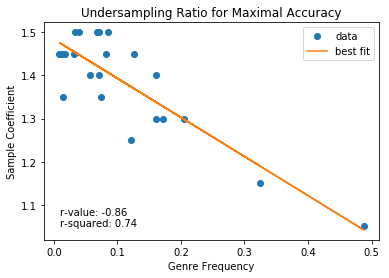

In [11]:
plt.plot(g['percent'], g['acc_coef'], 'o')
plt.plot(g['percent'], bestfit.slope*g['percent'] + bestfit.intercept)
# plt.scatter(g['percent'], g['f1_coef'])
# plt.legend(["undersampled\nmodel", "f1 model"])
plt.xlabel("Genre Frequency")
plt.ylabel("Sample Coefficient")
plt.title("Undersampling Ratio for Maximal Accuracy")
plt.legend(["data", "best fit", "z"])
plt.annotate(bestfit_r, xy=(0.01,1.05))
plt.savefig('figure_2.png')

# Figure 4 -- see other notebook (slow)

# Figure 3 - relative scores

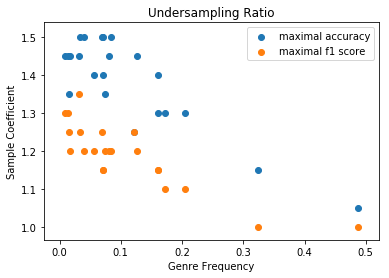

In [12]:
plt.scatter(g['percent'], g['acc_coef'])
plt.scatter(g['percent'], g['f1_coef'])
plt.legend(["maximal accuracy", "maximal f1 score"])
plt.xlabel("Genre Frequency")
plt.ylabel("Sample Coefficient")
plt.title("Undersampling Ratio")
plt.savefig('figure_4a.png')

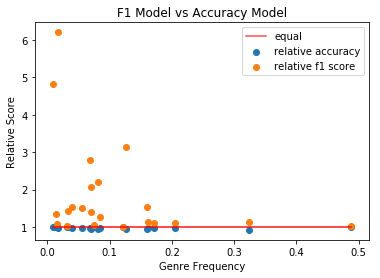

In [13]:
plt.plot(g['percent'], np.ones(g.shape[0]), 'r-', alpha=0.7)
plt.scatter(g['percent'], g['relative_accuracy'])
plt.scatter(g['percent'], g['relative_f1'])
plt.legend(['equal', 'relative accuracy', 'relative f1 score'])
plt.title("F1 Model vs Accuracy Model")
plt.xlabel("Genre Frequency")
plt.ylabel("Relative Score")
plt.savefig('figure_4b.png')

In [ ]:
XX

In [14]:
# Warning: this is slow

In [16]:
sample_coefs = [1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]
coef_coefs = [0.1, 0.25, 0.5, 0.75, 0.9] + sample_coefs + [1.75, 2.0, 2.25, 2.5]
coef_shape = (len(genres), len(coef_coefs))
# coef_coef = np.zeros(shape=coef_shape, dtype=object)
coef_score = np.zeros(shape=coef_shape, dtype=object)
coef_f1 = np.zeros(shape=coef_shape, dtype=object)
coef_recall = np.zeros(shape=coef_shape, dtype=object)
coef_precision = np.zeros(shape=coef_shape, dtype=object)

In [23]:
for i in range(len(genres)):
    j=0
    X_train, X_test, y_train, y_test = splitData(omdb)
    Xy_train = pd.concat([X_train, y_train], axis=1)
    g = genres[i]
    is_g = Xy_train[ Xy_train[g] == 1 ]
    isnt_g = Xy_train[ Xy_train[g] == 0 ]
        
    for k in coef_coefs:
        sample_coef = k
        
        isnt_g_newlen = int(len(is_g) * sample_coef)
        if(isnt_g_newlen > len(isnt_g)):
            isnt_g_newlen = len(isnt_g)
            sample_coef = len(isnt_g) / len(is_g)
            
        print(isnt_g_newlen, "from", len(isnt_g))
                
        isnt_g_undersampled = isnt_g.sample(n=isnt_g_newlen)
        Xy_train_u = pd.concat([is_g, isnt_g_undersampled]) 
        
        X_train_u = Xy_train_u['omdb_plot']
        y_train_u = Xy_train_u[g]
        model_u = createModel(X_train_u, y_train_u)
        
        y_predicts = model_u.predict(X_test['omdb_plot'])
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            score = sk.accuracy_score(y_test[g], y_predicts)
            f1 = sk.f1_score(y_test[g], y_predicts)
            recall = sk.recall_score(y_test[g], y_predicts)
            precision = sk.precision_score(y_test[g], y_predicts)
        #with
        
        coef_score[i][j] = score
        coef_f1[i][j] = f1
        coef_recall[i][j] = recall
        coef_precision[i][j] = precision
        
        f1_accuracyscore_thresh = 0.95 * gdf.iloc[i]['freq']
        fmt = "%2d %.2f %s %.3f f1:%.2f recall:%.2f isntg=%d thresh=%.2f base=%.2f"
        print(fmt % (
            i,
            sample_coef,
            g,
            score,
            f1,
            recall,
            len(isnt_g_undersampled),
            f1_accuracyscore_thresh,
            gdf.iloc[i]['freq']
        ))
        
        j += 1
    #for
#for

146 from 5585
 0 0.10 Action 0.198 f1:0.33 recall:1.00 isntg=146 thresh=0.75 base=0.79
366 from 5585
 0 0.25 Action 0.198 f1:0.33 recall:1.00 isntg=366 thresh=0.75 base=0.79
733 from 5585
 0 0.50 Action 0.201 f1:0.33 recall:1.00 isntg=733 thresh=0.75 base=0.79
1099 from 5585
 0 0.75 Action 0.406 f1:0.40 recall:0.99 isntg=1099 thresh=0.75 base=0.79
1319 from 5585
 0 0.90 Action 0.663 f1:0.53 recall:0.96 isntg=1319 thresh=0.75 base=0.79
1466 from 5585
 0 1.00 Action 0.781 f1:0.61 recall:0.88 isntg=1466 thresh=0.75 base=0.79
1539 from 5585
 0 1.05 Action 0.806 f1:0.63 recall:0.85 isntg=1539 thresh=0.75 base=0.79
1612 from 5585
 0 1.10 Action 0.826 f1:0.64 recall:0.78 isntg=1612 thresh=0.75 base=0.79
1685 from 5585
 0 1.15 Action 0.853 f1:0.65 recall:0.70 isntg=1685 thresh=0.75 base=0.79
1759 from 5585
 0 1.20 Action 0.858 f1:0.64 recall:0.65 isntg=1759 thresh=0.75 base=0.79
1832 from 5585
 0 1.25 Action 0.861 f1:0.62 recall:0.58 isntg=1832 thresh=0.75 base=0.79
1905 from 5585
 0 1.30 Acti

 4 1.30 Comedy 0.722 f1:0.30 recall:0.19 isntg=2978 thresh=0.64 base=0.68
3092 from 4760
 4 1.35 Comedy 0.709 f1:0.21 recall:0.12 isntg=3092 thresh=0.64 base=0.68
3207 from 4760
 4 1.40 Comedy 0.704 f1:0.19 recall:0.10 isntg=3207 thresh=0.64 base=0.68
3321 from 4760
 4 1.45 Comedy 0.696 f1:0.12 recall:0.07 isntg=3321 thresh=0.64 base=0.68
3436 from 4760
 4 1.50 Comedy 0.690 f1:0.09 recall:0.05 isntg=3436 thresh=0.64 base=0.68
4009 from 4760
 4 1.75 Comedy 0.680 f1:0.01 recall:0.01 isntg=4009 thresh=0.64 base=0.68
4582 from 4760
 4 2.00 Comedy 0.678 f1:0.00 recall:0.00 isntg=4582 thresh=0.64 base=0.68
4760 from 4760
 4 2.08 Comedy 0.678 f1:0.00 recall:0.00 isntg=4760 thresh=0.64 base=0.68
4760 from 4760
 4 2.08 Comedy 0.678 f1:0.00 recall:0.00 isntg=4760 thresh=0.64 base=0.68
110 from 5949
 5 0.10 Crime 0.175 f1:0.30 recall:1.00 isntg=110 thresh=0.80 base=0.84
275 from 5949
 5 0.25 Crime 0.175 f1:0.30 recall:1.00 isntg=275 thresh=0.80 base=0.84
551 from 5949
 5 0.50 Crime 0.175 f1:0.30 

 9 0.90 Fantasy 0.356 f1:0.19 recall:0.97 isntg=518 thresh=0.87 base=0.92
576 from 6475
 9 1.00 Fantasy 0.590 f1:0.24 recall:0.83 isntg=576 thresh=0.87 base=0.92
604 from 6475
 9 1.05 Fantasy 0.731 f1:0.31 recall:0.77 isntg=604 thresh=0.87 base=0.92
633 from 6475
 9 1.10 Fantasy 0.802 f1:0.34 recall:0.64 isntg=633 thresh=0.87 base=0.92
662 from 6475
 9 1.15 Fantasy 0.885 f1:0.40 recall:0.48 isntg=662 thresh=0.87 base=0.92
691 from 6475
 9 1.20 Fantasy 0.897 f1:0.40 recall:0.42 isntg=691 thresh=0.87 base=0.92
720 from 6475
 9 1.25 Fantasy 0.910 f1:0.37 recall:0.32 isntg=720 thresh=0.87 base=0.92
748 from 6475
 9 1.30 Fantasy 0.912 f1:0.35 recall:0.29 isntg=748 thresh=0.87 base=0.92
777 from 6475
 9 1.35 Fantasy 0.917 f1:0.26 recall:0.19 isntg=777 thresh=0.87 base=0.92
806 from 6475
 9 1.40 Fantasy 0.920 f1:0.21 recall:0.13 isntg=806 thresh=0.87 base=0.92
835 from 6475
 9 1.45 Fantasy 0.923 f1:0.17 recall:0.10 isntg=835 thresh=0.87 base=0.92
864 from 6475
 9 1.50 Fantasy 0.923 f1:0.15 re

13 2.25 Music 0.967 f1:0.05 recall:0.03 isntg=510 thresh=0.92 base=0.97
567 from 6824
13 2.50 Music 0.967 f1:0.05 recall:0.03 isntg=567 thresh=0.92 base=0.97
12 from 6931
14 0.10 Musical 0.018 f1:0.04 recall:1.00 isntg=12 thresh=0.93 base=0.98
30 from 6931
14 0.25 Musical 0.018 f1:0.04 recall:1.00 isntg=30 thresh=0.93 base=0.98
60 from 6931
14 0.50 Musical 0.018 f1:0.04 recall:1.00 isntg=60 thresh=0.93 base=0.98
90 from 6931
14 0.75 Musical 0.022 f1:0.04 recall:1.00 isntg=90 thresh=0.93 base=0.98
108 from 6931
14 0.90 Musical 0.160 f1:0.04 recall:0.90 isntg=108 thresh=0.93 base=0.98
120 from 6931
14 1.00 Musical 0.643 f1:0.07 recall:0.74 isntg=120 thresh=0.93 base=0.98
126 from 6931
14 1.05 Musical 0.689 f1:0.06 recall:0.60 isntg=126 thresh=0.93 base=0.98
132 from 6931
14 1.10 Musical 0.818 f1:0.10 recall:0.57 isntg=132 thresh=0.93 base=0.98
138 from 6931
14 1.15 Musical 0.847 f1:0.09 recall:0.43 isntg=138 thresh=0.93 base=0.98
144 from 6931
14 1.20 Musical 0.949 f1:0.13 recall:0.21 is

18 1.40 Sport 0.982 f1:0.28 recall:0.18 isntg=135 thresh=0.94 base=0.99
140 from 6954
18 1.45 Sport 0.982 f1:0.22 recall:0.14 isntg=140 thresh=0.94 base=0.99
145 from 6954
18 1.50 Sport 0.980 f1:0.08 recall:0.05 isntg=145 thresh=0.94 base=0.99
169 from 6954
18 1.75 Sport 0.982 f1:0.04 recall:0.02 isntg=169 thresh=0.94 base=0.99
194 from 6954
18 2.00 Sport 0.981 f1:0.00 recall:0.00 isntg=194 thresh=0.94 base=0.99
218 from 6954
18 2.25 Sport 0.981 f1:0.00 recall:0.00 isntg=218 thresh=0.94 base=0.99
242 from 6954
18 2.50 Sport 0.981 f1:0.00 recall:0.00 isntg=242 thresh=0.94 base=0.99
89 from 6158
19 0.10 Thriller 0.124 f1:0.22 recall:1.00 isntg=89 thresh=0.83 base=0.87
223 from 6158
19 0.25 Thriller 0.124 f1:0.22 recall:1.00 isntg=223 thresh=0.83 base=0.87
446 from 6158
19 0.50 Thriller 0.124 f1:0.22 recall:1.00 isntg=446 thresh=0.83 base=0.87
669 from 6158
19 0.75 Thriller 0.164 f1:0.23 recall:1.00 isntg=669 thresh=0.83 base=0.87
803 from 6158
19 0.90 Thriller 0.339 f1:0.26 recall:0.96 i

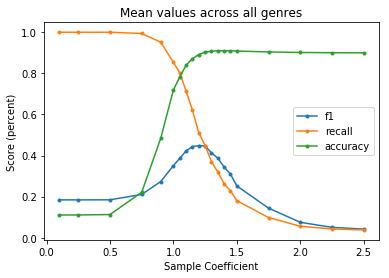

In [24]:
plt.plot(coef_coefs, coef_f1.mean(axis=0), '.-')
plt.plot(coef_coefs, coef_recall.mean(axis=0), '.-' )
plt.plot(coef_coefs, coef_score.mean(axis=0), '.-')
# plt.plot(coef_coefs, g['freq'].mean() * np.ones(len(coef_coefs)))
plt.xlabel("Sample Coefficient")
plt.ylabel("Score (percent)")
# plt.legend(["f1", "recall", "accuracy", "baseline\naccuracy"])
plt.legend(["f1", "recall", "accuracy"])
plt.title("Mean values across all genres")
plt.savefig('figure_3.png')

In [27]:
# The above loop reassigned g
g = gdf

Text(0.5,1,'Genre: Romance')

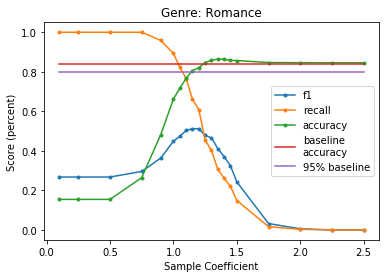

In [28]:
i=16
plt.plot(coef_coefs, coef_f1[i], '.-')
plt.plot(coef_coefs, coef_recall[i], '.-' )
plt.plot(coef_coefs, coef_score[i], '.-')
plt.plot(coef_coefs, g.iloc[i]['freq'] * np.ones(len(coef_coefs)))
plt.plot(coef_coefs, 0.95 * g.iloc[i]['freq'] * np.ones(len(coef_coefs)))
plt.xlabel("Sample Coefficient")
plt.ylabel("Score (percent)")
plt.legend(["f1", "recall", "accuracy", "baseline\naccuracy", "95% baseline"])
plt.title("Genre: " + g.iloc[i]['genre'])